<a href="https://colab.research.google.com/github/shashankshri10/PPC-Assignment/blob/main/PPC_Assign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PPC Assignment 1
##Introduction
This report demonstrates the result and accuracy of applying several forecasting techniques on a dataset. The control chart and tracking signals are also made for the forecasting techniques. The dataset is a time series dataset about pizza sales made.
##Time Series behavior
 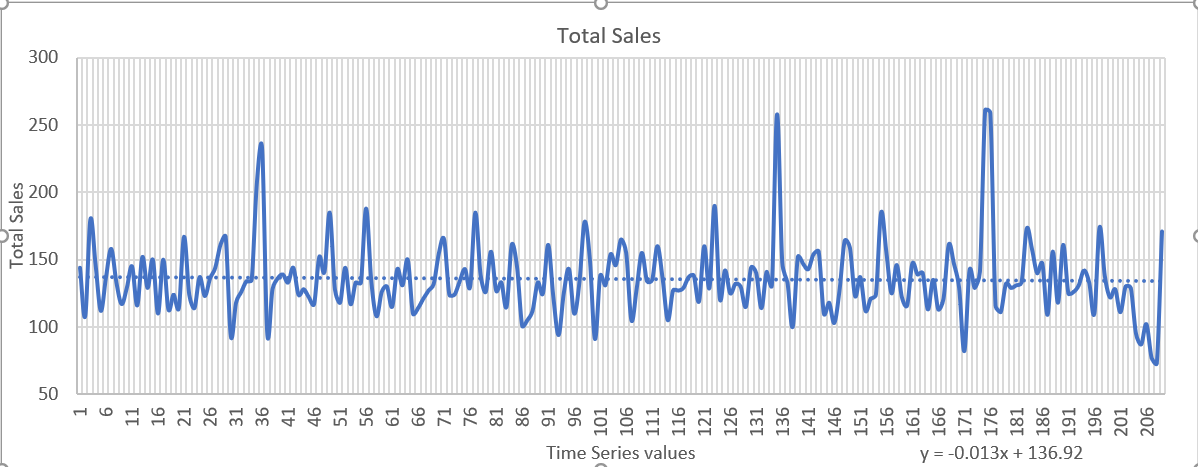
As is visible from the graph of the total sales Vs time series values, the data set follows a **stationary trend**, i.e. the observations vary around a constant value (the mean which in this case is **135.56**). In this case the linear trendline if the data has an intercept value of **136.92** which is very close to the mean value, and since the slope of the trendline is close to 0, we can assume that the trendline is almost horizontal.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PPC assign/updated_ps_2.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   time_series  100 non-null    int64
 1   tot_sales    100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [ ]:
df.head(10)
# prints the top 10 rows of the rows

,time_series,tot_sales
0,1,161
1,2,160
2,3,154
3,4,106
4,5,121
5,6,144
6,7,133
7,8,171
8,9,123
9,10,145


In [ ]:
df["Naive_Forecast"] = df["tot_sales"].shift()

In [ ]:
df["NF_abs_err"] = np.abs(df["tot_sales"]-df["Naive_Forecast"])
df["NF_nonabs_err"] = df["tot_sales"]-df["Naive_Forecast"]

In [ ]:
df["MA(4)_forecast"] = df['tot_sales'].rolling(window=4).mean().shift(1)

In [ ]:
df["MA(4)_err"] = np.abs(df["tot_sales"]-df["MA(4)_forecast"])
df["MA(4)_nonabs_err"] = df["tot_sales"]-df["MA(4)_forecast"]

In [ ]:
# now ES using alpha = 2/(4+1)=0.4
#df["ES(0.4)"]=df["tot_sales"].ewm(alpha=0.4,adjust=False).mean()
model = ExponentialSmoothing(df["tot_sales"],trend='add',seasonal=None)
model_fit = model.fit(smoothing_level=0.4)
forecast=model_fit.fittedvalues
df["ES(0.4)"] = forecast
df["ES(0.4)_err"] = np.abs(df["tot_sales"]-df["ES(0.4)"])
df["ES(0.4)_nonabs_err"] = df["tot_sales"]-df["ES(0.4)"]
print(df)

    time_series  tot_sales  Naive_Forecast  NF_abs_err  NF_nonabs_err  \
0             1        161             NaN         NaN            NaN   
1             2        160           161.0         1.0           -1.0   
2             3        154           160.0         6.0           -6.0   
3             4        106           154.0        48.0          -48.0   
4             5        121           106.0        15.0           15.0   
..          ...        ...             ...         ...            ...   
95           96        153           116.0        37.0           37.0   
96           97        136           153.0        17.0          -17.0   
97           98        131           136.0         5.0           -5.0   
98           99        121           131.0        10.0          -10.0   
99          100        142           121.0        21.0           21.0   

    MA(4)_forecast  MA(4)_err  MA(4)_nonabs_err     ES(0.4)  ES(0.4)_err  \
0              NaN        NaN               NaN

In [ ]:
MA_err_var = np.var(df["MA(4)_err"])
ES_err_var = np.var(df["ES(0.4)_err"])
print("MA_error_variance=",MA_err_var)
print("ES_error_variance=",ES_err_var)

MA_error_variance= 184.03602430555554
ES_error_variance= 177.81955992238844


In [ ]:
df["NF_abs_err_sq"] = df["NF_abs_err"]*df["NF_abs_err"]
df["MA(4)_err_sq"] = df["MA(4)_err"]*df["MA(4)_err"]
df["ES(0.4)_err_sq"] = df["ES(0.4)_err"]*df["ES(0.4)_err"]

In [ ]:
NF_MSE = np.mean(df["NF_abs_err_sq"])
MA4_MSE = np.mean(df["MA(4)_err_sq"])
ES_MSE = np.mean(df["ES(0.4)_err_sq"])
print("NF_MSE",NF_MSE)
print("MA4_MSE",MA4_MSE)
print("ES_MSE",ES_MSE)

NF_MSE 696.3737373737374
MA4_MSE 430.7877604166667
ES_MSE 444.0750934406735


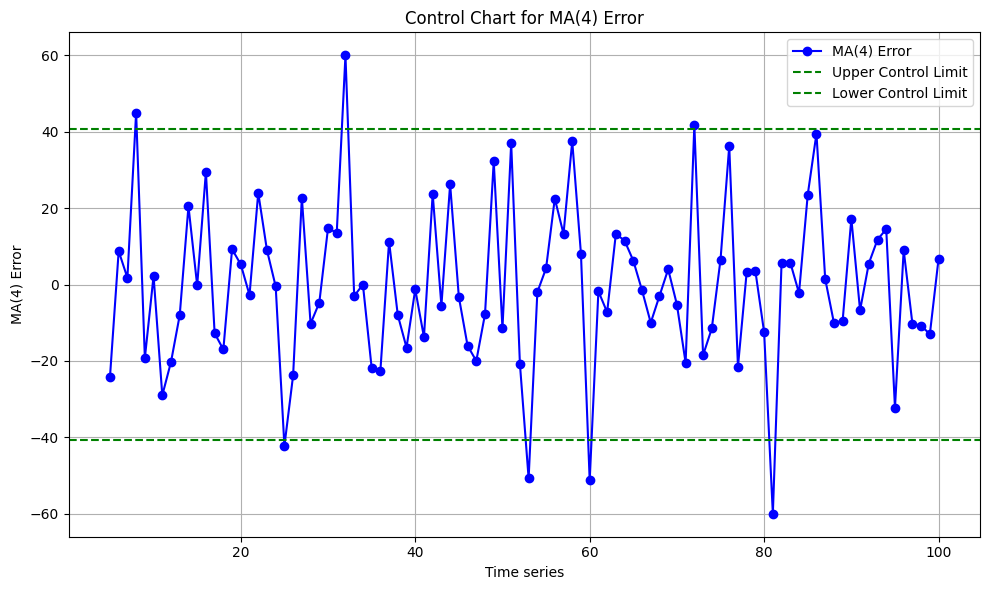

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df["time_series"],df["MA(4)_nonabs_err"],marker='o',linestyle='-',color='b',label='MA(4) Error')
plt.axhline(y=1.96 * np.sqrt(MA4_MSE), color='g', linestyle='--', label='Upper Control Limit')
plt.axhline(y=-1.96 * np.sqrt(MA4_MSE), color='g', linestyle='--', label='Lower Control Limit')
plt.xlabel('Time series')
plt.ylabel('MA(4) Error')
plt.title('Control Chart for MA(4) Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

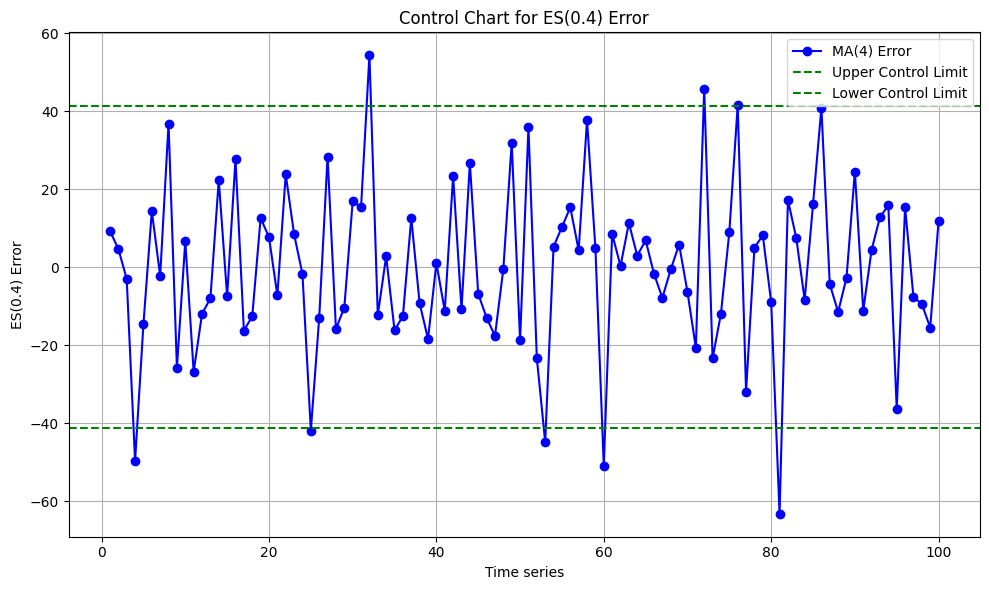

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df["time_series"],df["ES(0.4)_nonabs_err"],marker='o',linestyle='-',color='b',label='MA(4) Error')
plt.axhline(y=1.96 * np.sqrt(ES_MSE), color='g', linestyle='--', label='Upper Control Limit')
plt.axhline(y=-1.96 * np.sqrt(ES_MSE), color='g', linestyle='--', label='Lower Control Limit')
plt.xlabel('Time series')
plt.ylabel('ES(0.4) Error')
plt.title('Control Chart for ES(0.4) Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

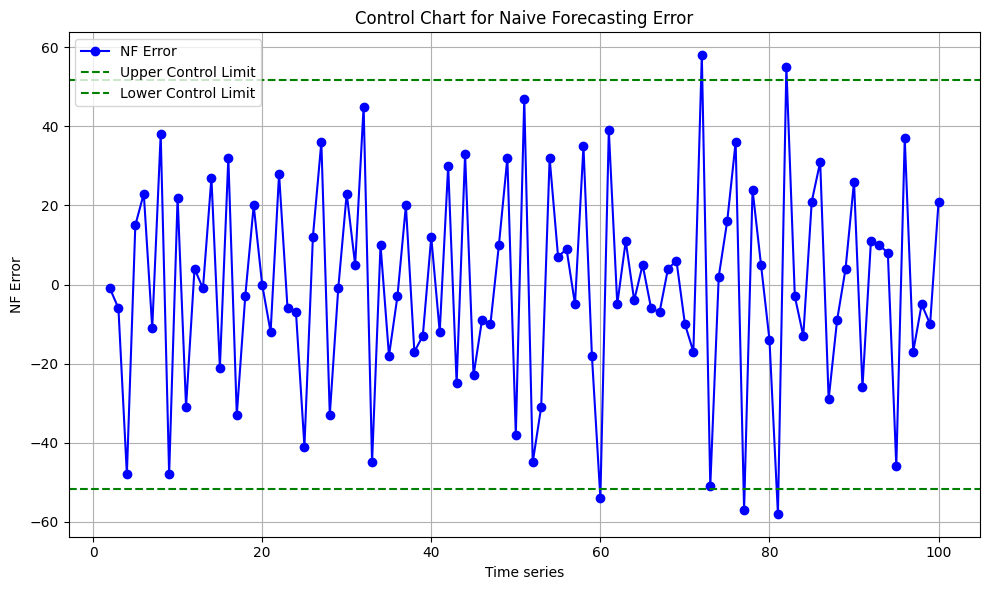

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df["time_series"],df["NF_nonabs_err"],marker='o',linestyle='-',color='b',label='NF Error')
plt.axhline(y=1.96 * np.sqrt(NF_MSE), color='g', linestyle='--', label='Upper Control Limit')
plt.axhline(y=-1.96 * np.sqrt(NF_MSE), color='g', linestyle='--', label='Lower Control Limit')
plt.xlabel('Time series')
plt.ylabel('NF Error')
plt.title('Control Chart for Naive Forecasting Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# cumulative_forecast_errors = np.cumsum(forecast_errors)
# mad = np.mean(np.abs(forecast_errors))
# tracking_signal = cumulative_forecast_errors / mad
# For NF
df["NF_cum_err"] = np.cumsum(df['NF_nonabs_err'])
NF_MAD_err = np.mean(df['NF_abs_err'])
df["NF_TS"] = df["NF_cum_err"]/NF_MAD_err

#For MA(4)
df["MA4_cum_err"] = np.cumsum(df['MA(4)_nonabs_err'])
MA4_MAD_err = np.mean(df['MA(4)_err'])
df["MA4_TS"] = df["MA4_cum_err"]/MA4_MAD_err

#For ES(0.4)
df["ES_cum_err"] = np.cumsum(df['ES(0.4)_nonabs_err'])
ES_MAD_err = np.mean(df['ES(0.4)_err'])
df["ES_TS"] = df["ES_cum_err"]/ES_MAD_err

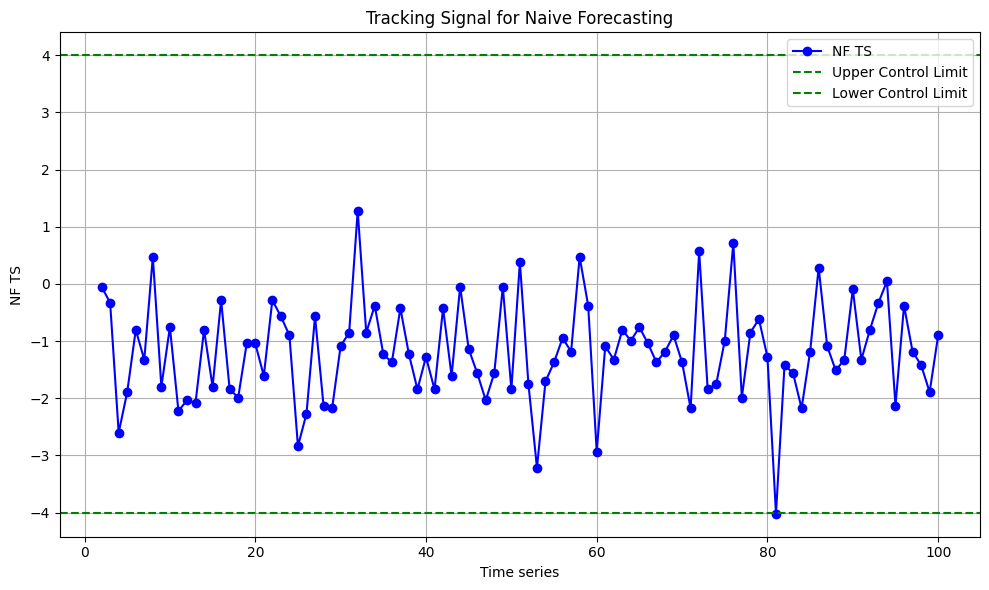

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df["time_series"],df["NF_TS"],marker='o',linestyle='-',color='b',label='NF TS')
plt.axhline(y=4, color='g', linestyle='--', label='Upper Control Limit')
plt.axhline(y=-4, color='g', linestyle='--', label='Lower Control Limit')
plt.xlabel('Time series')
plt.ylabel('NF TS')
plt.title('Tracking Signal for Naive Forecasting')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

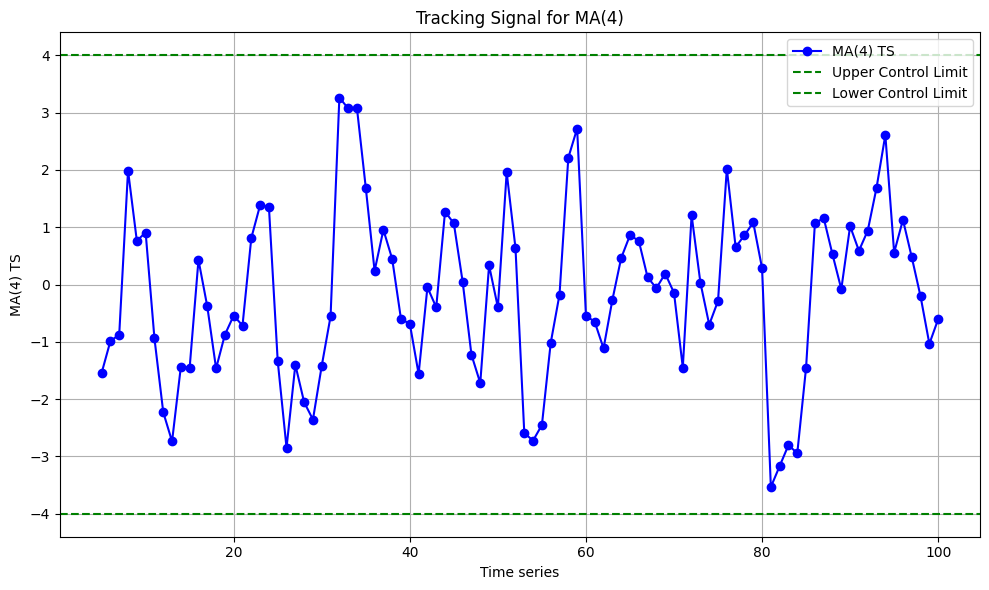

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df["time_series"],df["MA4_TS"],marker='o',linestyle='-',color='b',label='MA(4) TS')
plt.axhline(y=4, color='g', linestyle='--', label='Upper Control Limit')
plt.axhline(y=-4, color='g', linestyle='--', label='Lower Control Limit')
plt.xlabel('Time series')
plt.ylabel('MA(4) TS')
plt.title('Tracking Signal for MA(4)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

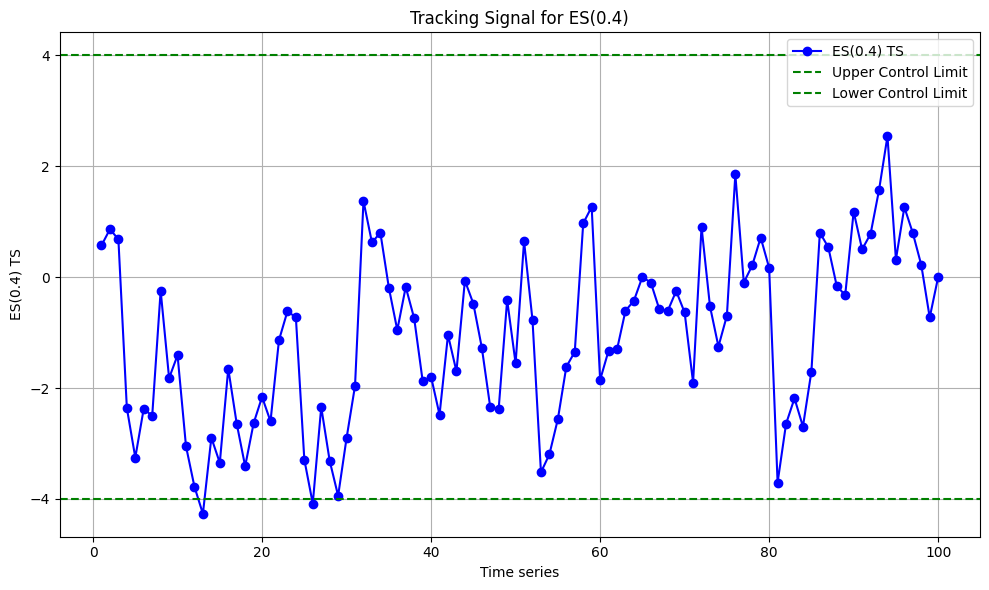

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df["time_series"],df["ES_TS"],marker='o',linestyle='-',color='b',label='ES(0.4) TS')
plt.axhline(y=4, color='g', linestyle='--', label='Upper Control Limit')
plt.axhline(y=-4, color='g', linestyle='--', label='Lower Control Limit')
plt.xlabel('Time series')
plt.ylabel('ES(0.4) TS')
plt.title('Tracking Signal for ES(0.4)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
#MSE And Mape
NF_MSE_err = np.mean(df['NF_abs_err_sq'])
MA4_MSE_err = np.mean(df['MA(4)_err_sq'])
ES_MSE_err = np.mean(df['ES(0.4)_err_sq'])

NF_MAPE_err = np.mean((df['NF_abs_err']/df['tot_sales'])*100)
MA4_MAPE_err = np.mean((df['MA(4)_err']/df['tot_sales'])*100)
ES_MAPE_err = np.mean((df['ES(0.4)_err']/df['tot_sales'])*100)
print(NF_MSE_err,MA4_MSE_err,ES_MSE_err)
print(NF_MAPE_err,MA4_MAPE_err,ES_MAPE_err)

696.3737373737374 430.7877604166667 444.0750934406735
16.089362869434797 12.029989190563391 12.539921944927745


In [ ]:
print(NF_MAD_err,MA4_MAD_err,ES_MAD_err)

21.141414141414142 15.708333333333334 16.317338432424727


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time_series         100 non-null    int64  
 1   tot_sales           100 non-null    int64  
 2   Naive_Forecast      99 non-null     float64
 3   NF_abs_err          99 non-null     float64
 4   NF_nonabs_err       99 non-null     float64
 5   MA(4)_forecast      96 non-null     float64
 6   MA(4)_err           96 non-null     float64
 7   MA(4)_nonabs_err    96 non-null     float64
 8   ES(0.4)             100 non-null    float64
 9   ES(0.4)_err         100 non-null    float64
 10  ES(0.4)_nonabs_err  100 non-null    float64
 11  NF_abs_err_sq       99 non-null     float64
 12  MA(4)_err_sq        96 non-null     float64
 13  ES(0.4)_err_sq      100 non-null    float64
 14  NF_cum_err          99 non-null     float64
 15  NF_TS               99 non-null     float64
 16  MA4_cum_e

In [ ]:
final_df = df[["time_series",'tot_sales','MA(4)_forecast','MA(4)_err','MA(4)_err_sq','MA4_TS']].copy()

In [ ]:
final_df.to_csv('final_dataframe.csv', index=False)